In [6]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Load your dataset
df = pd.read_csv("Enrolment Report 2020 to 2024.csv")

# Display first rows
df.head()


,Student ID,Course Instance,Course Status,Session Year,Session Name,Session Start Date,Session End Date,Subject Visible,Subject Faculty Approval Date,Subject Code,...,Course Code,Course Name,Course Faculty,Course New Faculty,Course Version,Course Calendar,Course Type,Course Credit Points,Course Instance Campus,Course Instance Delivery
0,ewpyqew,469,Complete,2020,DXB PG Spring,26-Jan-20,16-May-20,Y,13-09-2019,EDGL923,...,469,Master of Educational Studies - Dubai,Social Sciences,"The Arts, Social Sciences and Humanities",2019,Postgraduate,Master's by Coursework,72,Dubai,On Campus
1,ewpyqew,469,Complete,2020,DXB PG Spring,26-Jan-20,16-May-20,Y,13-09-2019,EDGS901,...,469,Master of Educational Studies - Dubai,Social Sciences,"The Arts, Social Sciences and Humanities",2019,Postgraduate,Master's by Coursework,72,Dubai,On Campus
2,ewpyqew,469,Complete,2020,DXB PG Summer,7-Jun-20,23-Jul-20,Y,13-09-2019,EDGI900,...,469,Master of Educational Studies - Dubai,Social Sciences,"The Arts, Social Sciences and Humanities",2019,Postgraduate,Master's by Coursework,72,Dubai,On Campus
3,ertypoy,1420,Lapsed,2020,DXB PG Spring,26-Jan-20,16-May-20,Y,9/9/2019,FIN 907,...,1420,Master of Business Administration - Dubai,Business,Business and Law,2017,Postgraduate,Master's by Coursework,72,Dubai,On Campus
4,eroiqri,251,Complete,2020,DXB PG Spring,26-Jan-20,16-May-20,Y,5/9/2019,THES912,...,251,Doctor of Philosophy (Integrated) - Dubai,Central Administration,Central Administration,2013,Postgraduate,Doctorate by Research,204,Dubai,On Campus


In [7]:
print("Dataset shape:", df.shape)


Dataset shape: (108595, 38)


In [8]:
from itertools import combinations
from collections import Counter

# Group subjects by Student ID, Session, and Year
student_subjects = df.groupby(["Student ID", "Session Name", "Session Year"])["Subject Code"].apply(list)

# Initialize counter for subject pairs
subject_pairs = Counter()

# Find subject pairs that occur in the same student, session, and year
for subjects in student_subjects:
    for pair in combinations(subjects, 2):  # Get all possible subject pairs
        subject_pairs[pair] += 1

# Convert to DataFrame
frequent_subjects = pd.DataFrame(subject_pairs.items(), columns=["Subject Pair", "Count"])

# Sort by most common pairs
frequent_subjects = frequent_subjects.sort_values(by="Count", ascending=False)

# Display top 10 most frequent subject combinations
frequent_subjects.head(10)


,Subject Pair,Count
84,"(MARK101, MGNT110)",776
33,"(CSIT110, CSIT123)",682
62,"(ACCY121, BUS 101)",599
155,"(CSIT115, CSIT121)",588
119,"(BUS 030, CSIT040)",563
178,"(BUS 030, MATH030)",548
174,"(CSIT115, CSIT127)",509
79,"(CSIT110, CSIT114)",501
285,"(CSIT114, CSIT123)",491
175,"(CSIT121, CSIT127)",488


In [9]:
# Initialize counter for subject triples
subject_triples = Counter()

# Find subject triples that occur in the same student, session, and year
for subjects in student_subjects:
    for triple in combinations(subjects, 3):  # Get all possible subject triples
        subject_triples[triple] += 1

# Convert to DataFrame
frequent_subject_triples = pd.DataFrame(subject_triples.items(), columns=["Subject Triple", "Count"])

# Sort by most common triples
frequent_subject_triples = frequent_subject_triples.sort_values(by="Count", ascending=False)

# Display top 10 most frequent subject triples
frequent_subject_triples.head(10)


,Subject Triple,Count
101,"(CSIT110, CSIT114, CSIT123)",469
50,"(CSIT115, CSIT121, CSIT127)",392
494,"(ACCY121, BUS 101, BUS 121)",263
42,"(CSIT111, CSIT113, CSIT114)",252
472,"(ACCY121, MARK101, MGNT110)",229
5,"(ENGG103, ENGG105, MATH141)",203
84,"(BUS 030, CSIT040, MATH030)",194
1874,"(ENGG102, ENGG105, MATH141)",177
94,"(BUS 101, MARK101, MGNT110)",145
9,"(ENGG102, MATH142, PHYS143)",140


In [10]:
!pip install networkx matplotlib


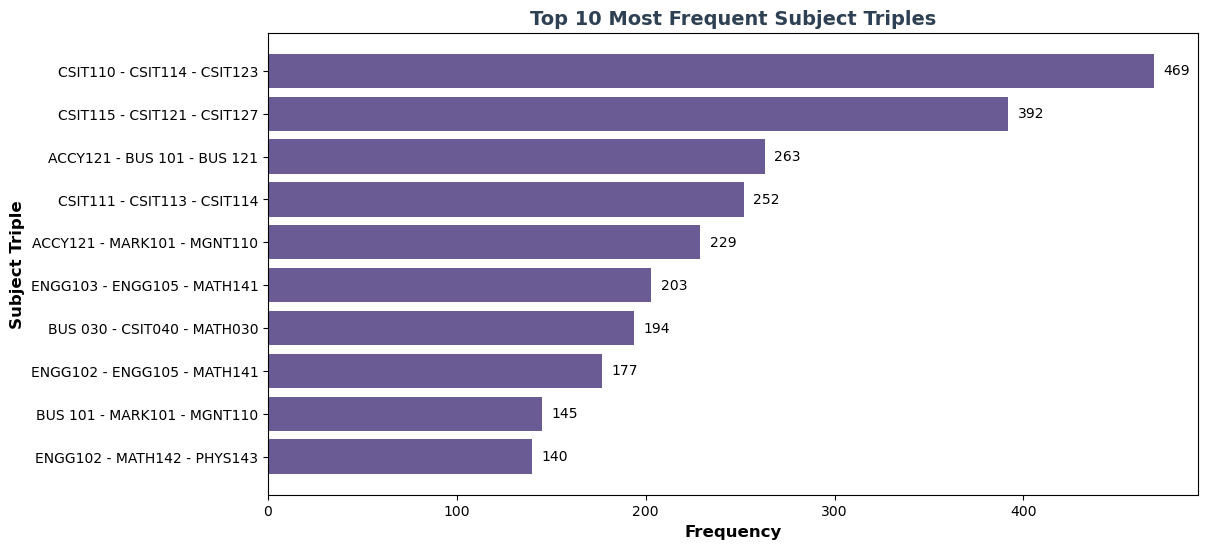

'simple_frequent_subject_triples.png'

In [17]:
import matplotlib.pyplot as plt

# Extract top 10 triples and their counts
triples = [" - ".join(triple) for triple in frequent_subject_triples["Subject Triple"][:10]]
counts = frequent_subject_triples["Count"][:10]

# Create a simple bar chart
plt.figure(figsize=(12, 6))
plt.barh(triples[::-1], counts[::-1], color="#6B5B95")  # Reverse order for better display

# Labels and title
plt.xlabel("Frequency", fontsize=12, fontweight="bold")
plt.ylabel("Subject Triple", fontsize=12, fontweight="bold")
plt.title("Top 10 Most Frequent Subject Triples", fontsize=14, fontweight="bold", color="#2E4053")

# Show values on bars
for index, value in enumerate(counts[::-1]):
    plt.text(value + 5, index, str(value), fontsize=10, verticalalignment="center")

# Save the figure
simple_image_path = "simple_frequent_subject_triples.png"
plt.savefig(simple_image_path, format="png", dpi=300, bbox_inches="tight")

# Show the figure in the notebook
plt.show()

# Optionally return path for reference
simple_image_path


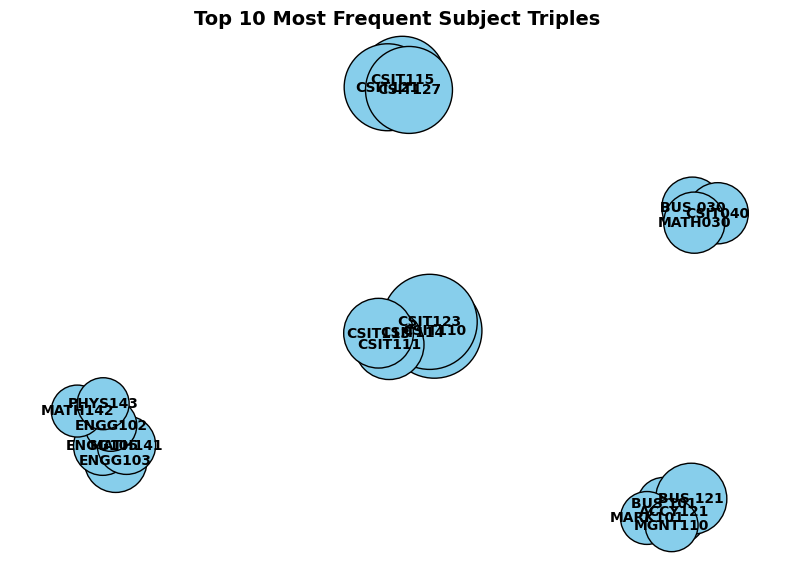

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Select the top 10 most frequent triples
top_triples = frequent_subject_triples.head(10)

# Create a graph object
G = nx.Graph()

# Add nodes and edges from the top 10 triples
for index, row in top_triples.iterrows():
    subject1, subject2, subject3 = row["Subject Triple"]
    count = row["Count"]

    # Add nodes (Subjects)
    G.add_node(subject1, size=count)
    G.add_node(subject2, size=count)
    G.add_node(subject3, size=count)

    # Add edges (Connections between subjects)
    G.add_edge(subject1, subject2, weight=count)
    G.add_edge(subject2, subject3, weight=count)
    G.add_edge(subject1, subject3, weight=count)

# Define node sizes based on frequency
node_sizes = [G.nodes[node]["size"] * 10 for node in G.nodes]

# Draw the network graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Positioning
edges = G.edges(data=True)
weights = [edata["weight"] for _, _, edata in edges]  # Edge weights

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(G, pos, width=[w / 10 for w in weights], alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Title
plt.title("Top 10 Most Frequent Subject Triples", fontsize=14, fontweight="bold")
plt.axis("off")  # Hide axis
plt.show()


C:\Users\khaledeid\AppData\Local\Temp\ipykernel_25124\1760233342.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", num_nodes)  # Use "tab10" colormap


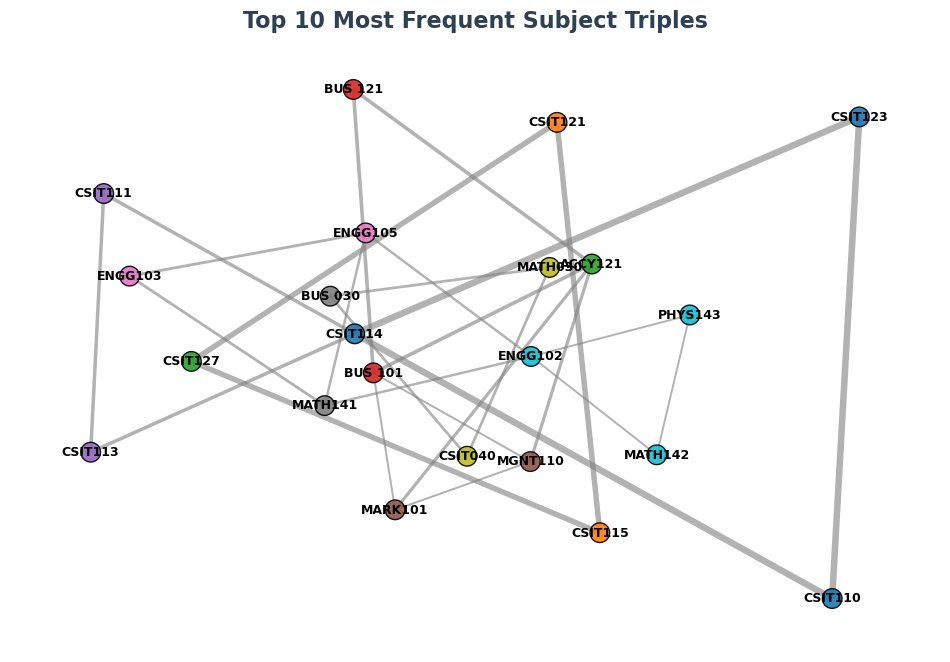

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
frequent_subject_triples = pd.DataFrame({
    "Subject Triple": [
        ("CSIT110", "CSIT114", "CSIT123"),
        ("CSIT115", "CSIT121", "CSIT127"),
        ("ACCY121", "BUS 101", "BUS 121"),
        ("CSIT111", "CSIT113", "CSIT114"),
        ("ACCY121", "MARK101", "MGNT110"),
        ("ENGG103", "ENGG105", "MATH141"),
        ("BUS 030", "CSIT040", "MATH030"),
        ("ENGG102", "ENGG105", "MATH141"),
        ("BUS 101", "MARK101", "MGNT110"),
        ("ENGG102", "MATH142", "PHYS143")
    ],
    "Count": [469, 392, 263, 252, 229, 203, 194, 177, 145, 140]
})

# Select the top 10 most frequent triples
top_triples = frequent_subject_triples.head(10)

# Create a graph object
G = nx.Graph()

# Add nodes and edges from the top 10 triples
for index, row in top_triples.iterrows():
    subject1, subject2, subject3 = row["Subject Triple"]
    count = row["Count"]

    # Add nodes (Ensuring unique subjects)
    G.add_node(subject1, size=200)
    G.add_node(subject2, size=200)
    G.add_node(subject3, size=200)

    # Add edges (Connections between subjects)
    G.add_edge(subject1, subject2, weight=count)
    G.add_edge(subject2, subject3, weight=count)
    G.add_edge(subject1, subject3, weight=count)

# Define node sizes (fixed and reduced to prevent overlap)
node_sizes = [G.nodes[node]["size"] for node in G.nodes]

# Generate colors dynamically based on the number of nodes
num_nodes = len(G.nodes)
cmap = plt.cm.get_cmap("tab10", num_nodes)  # Use "tab10" colormap
node_colors = [cmap(i) for i in range(num_nodes)]

# Use an optimized layout for better spacing
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)  # Best for preventing overlap
edges = G.edges(data=True)
weights = [edata["weight"] / 100 for _, _, edata in edges]  # Scale edge weights

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors="black", alpha=0.9)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold", font_color="black")

# Title
plt.title("Top 10 Most Frequent Subject Triples", fontsize=16, fontweight="bold", color="#2E4053")
plt.axis("off")  # Hide axis
plt.show()


In [13]:
import os

output_dir = "C:/mnt/data"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

simple_image_path = os.path.join(output_dir, "simple_frequent_subject_triples.png")
plt.savefig(simple_image_path, format="png", dpi=300, bbox_inches="tight")


In [14]:
import matplotlib.pyplot as plt

# Extract top 10 triples and their counts
triples = [" - ".join(triple) for triple in frequent_subject_triples["Subject Triple"][:10]]
counts = frequent_subject_triples["Count"][:10]

# Create a simple bar chart
plt.figure(figsize=(12, 6))
plt.barh(triples[::-1], counts[::-1], color="#6B5B95")  # Reverse order for better display

# Labels and title
plt.xlabel("Frequency", fontsize=12, fontweight="bold")
plt.ylabel("Subject Triple", fontsize=12, fontweight="bold")
plt.title("Top 10 Most Frequent Subject Triples", fontsize=14, fontweight="bold", color="#2E4053")

# Show values on bars
for index, value in enumerate(counts[::-1]):
    plt.text(value + 5, index, str(value), fontsize=10, verticalalignment="center")

# Save the figure as a PNG file
simple_image_path = "/mnt/data/simple_frequent_subject_triples.png"
plt.savefig(simple_image_path, format="png", dpi=300, bbox_inches="tight")
plt.close()

# Provide the download link
simple_image_path


'/mnt/data/simple_frequent_subject_triples.png'

In [15]:
%matplotlib inline
